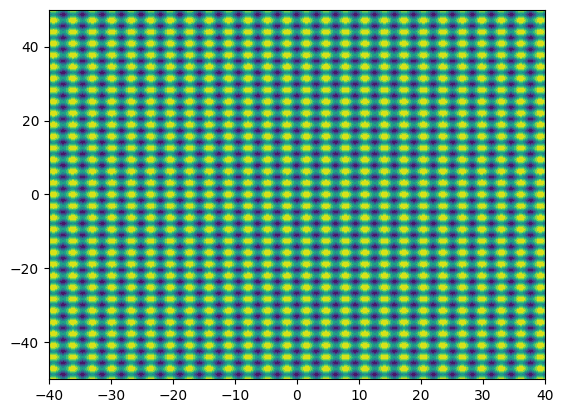

In [8]:
import matplotlib.pyplot as plt
import numpy as np
XX,yy=np.meshgrid(np.linspace(-40,40,1000),np.linspace(-50,50,1000))
Z=(np.sin(XX))**2+(np.cos(yy))**2
plt.contourf(XX,yy,Z)

In [100]:
import pandas as pd
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [101]:
df=df.drop(columns=['User ID','Gender'])

In [102]:
# from sklearn.preprocessing import LabelEncoder
# L=LabelEncoder()
# df['Gender']=L.fit_transform(df['Gender'])

In [103]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.20,random_state=0)

In [104]:
# X_train=np.array(X_train)
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
X_train=S.fit_transform(X_train)
X_test=S.transform(X_test)

In [105]:
X_train[:1]

array([[1.92295008, 2.14601566]])

In [106]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)
print(a.shape)
print(b.shape)

(609,)
(592,)


In [107]:
aa,bb=np.meshgrid(a,b)

In [108]:
print(aa.shape)

(592, 609)


In [109]:
# 609*592

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
KNN=KNeighborsClassifier(n_neighbors=11)
model=KNN.fit(X_train,y_train)

In [119]:
print(aa[0][0])
print(bb[0][0])

-2.9654797790006904
-2.5913815646031484


In [120]:
model.predict(np.array([-2.9654797790006904,
-2.5913815646031484]).reshape(1,2))

array([0])

In [121]:
input_arr=np.array([aa.ravel(),bb.ravel()]).T
input_arr.shape

(360528, 2)

In [122]:
y_pred=KNN.predict(input_arr)
y_pred.shape

(360528,)

In [123]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [124]:
# unique_values, counts = np.unique(y_pred, return_counts=True)
# # Display the results
# print("Unique Values:", unique_values)
# print("Counts:", counts)

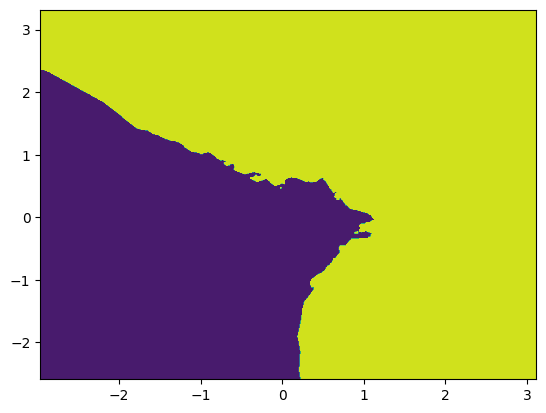

In [125]:
plt.contourf(aa,bb,y_pred.reshape(aa.shape))

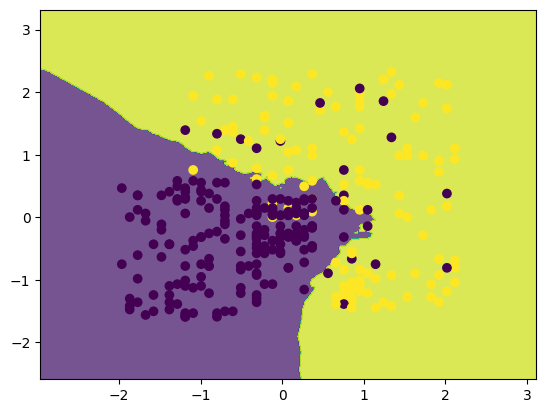

In [128]:
plt.contourf(aa,bb,y_pred.reshape(aa.shape),alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)